<a href="https://colab.research.google.com/github/atalianb/BeePy3.5/blob/main/DataFrames101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Primero conectamos a nuetro Drive donde están los datos, previamente descagados.

Utilizaremos los datos de transacciones de [kaggle](https://www.kaggle.com/datasets/prasad22/retail-transactions-dataset/data)


In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Importamos algunas librerías útilies para graficar y leer los datos

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='white',palette='colorblind')
pal = sns.color_palette('colorblind')
import plotly.express as px


In [3]:
path = '/content/gdrive/MyDrive/DF101Visual/'

In [4]:
df=pd.read_csv(path+'Retail_Transactions_Dataset.csv')

In [5]:
#Exploramos que contienen nuestros datos
df

,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion
0,1000000000,2020-12-21 19:42:52,Cheyenne Newman,['Hair Gel'],6,12.77,Debit Card,New York,Convenience Store,True,Student,Winter,None
1,1000000001,2020-07-06 07:45:16,Emily Fitzgerald,"['Tuna', 'Bread', 'Tissues', 'Trash Bags']",5,13.88,Debit Card,Houston,Supermarket,False,Professional,Fall,BOGO (Buy One Get One)
2,1000000002,2021-10-02 06:28:44,Michael Webb,"['Jam', 'Soap', 'Ketchup']",7,47.02,Debit Card,Miami,Convenience Store,False,Young Adult,Winter,None
3,1000000003,2022-01-10 05:39:02,Kimberly Lin,['BBQ Sauce'],9,83.86,Mobile Payment,Seattle,Warehouse Club,True,Senior Citizen,Summer,Discount on Selected Items
4,1000000004,2021-10-13 07:28:47,Cathy Hernandez,"['Hand Sanitizer', 'Bread', 'Extension Cords',...",4,30.55,Debit Card,Houston,Warehouse Club,False,Senior Citizen,Spring,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1000029995,2023-10-16 06:01:01,Candice Wilson,"['Butter', 'Tuna', 'Vinegar', 'Shower Gel', 'O...",7,31.74,Debit Card,New York,Supermarket,True,Professional,Spring,Discount on Selected Items
29996,1000029996,2020-04-08 17:31:16,Jay Yu,['Honey'],8,5.84,Cash,Chicago,Pharmacy,True,Professional,Summer,Discount on Selected Items
29997,1000029997,2020-12-18 07:10:45,Larry Miller,"['Ironing Board', 'Toothbrush']",7,51.10,Credit Card,Los Angeles,Supermarket,True,Young Adult,Fall,Discount on Selected Items
29998,1000029998,2020-02-28 00:29:39,Jeremy Foster,"['Broom', 'Lawn Mower']",7,65.67,Mobile Payment,Seattle,Department Store,True,Retiree,Summer,BOGO (Buy One Get One)


In [6]:
#Obtenemos el nombre de las columnas de nuestro df
df.columns

Index(['Transaction_ID', 'Date', 'Customer_Name', 'Product', 'Total_Items',
       'Total_Cost', 'Payment_Method', 'City', 'Store_Type',
       'Discount_Applied', 'Customer_Category', 'Season', 'Promotion'],
      dtype='object')

In [7]:
df['Date']

0        2020-12-21 19:42:52
1        2020-07-06 07:45:16
2        2021-10-02 06:28:44
3        2022-01-10 05:39:02
4        2021-10-13 07:28:47
                ...         
29995    2023-10-16 06:01:01
29996    2020-04-08 17:31:16
29997    2020-12-18 07:10:45
29998    2020-02-28 00:29:39
29999    2020-11-22 04:59:34
Name: Date, Length: 30000, dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Transaction_ID     30000 non-null  int64  
 1   Date               30000 non-null  object 
 2   Customer_Name      30000 non-null  object 
 3   Product            30000 non-null  object 
 4   Total_Items        30000 non-null  int64  
 5   Total_Cost         30000 non-null  float64
 6   Payment_Method     30000 non-null  object 
 7   City               30000 non-null  object 
 8   Store_Type         30000 non-null  object 
 9   Discount_Applied   30000 non-null  bool   
 10  Customer_Category  30000 non-null  object 
 11  Season             30000 non-null  object 
 12  Promotion          30000 non-null  object 
dtypes: bool(1), float64(1), int64(2), object(9)
memory usage: 2.8+ MB


In [9]:
#Contamos el número de elementos únicos
df.nunique()

Transaction_ID       30000
Date                 29994
Customer_Name        25725
Product              21967
Total_Items             10
Total_Cost            9132
Payment_Method           4
City                    10
Store_Type               6
Discount_Applied         2
Customer_Category        8
Season                   4
Promotion                3
dtype: int64

In [10]:
(df.isnull() | df.empty | df.isna()).sum()

Transaction_ID       0
Date                 0
Customer_Name        0
Product              0
Total_Items          0
Total_Cost           0
Payment_Method       0
City                 0
Store_Type           0
Discount_Applied     0
Customer_Category    0
Season               0
Promotion            0
dtype: int64

In [11]:
#Guardamos el número inicial de filas en el df
items = df.shape[0]
items

30000

In [12]:
#Quitamos aquellas filas que estén duplicadas
df = df.drop_duplicates()

In [13]:
#Guardamos el número de filas sin los duplicados
items1 = df.shape[0]
print(f'Hay {items-items1} duplicados en el conjunto de datos')

Hay 0 duplicados en el conjunto de datos


# Ya vimos que no hay duplicados. Ahora ¿Me sirven todas las columnas?

Si crees que hay columnas de las que puedes presindir. Hay dos formas en las que puedes quitarte columnas
* haciendo un subDataFrame
* renombrando tu DataFrame y utilizando el método 'drop'

Si crees que te sirven todas las columnas puedes trabajar con el DataFrame completo como lo tenemos hasta ahora


In [30]:
#Aquí la celda para quitarte columnas si lo consideras necesario
df = df.drop(#Completa)
subDF = df[['NombreColumna1','NombreColumna2','NombreColumna3']]

In [14]:
#Descriptive Stats
df.describe(include=object).T

,count,unique,top,freq
Date,30000,29994,2022-09-26 07:32:55,2
Customer_Name,30000,25725,Michael Smith,21
Product,30000,21967,['Toothpaste'],121
Payment_Method,30000,4,Debit Card,7625
City,30000,10,Los Angeles,3115
Store_Type,30000,6,Specialty Store,5059
Customer_Category,30000,8,Student,3904
Season,30000,4,Spring,7565
Promotion,30000,3,BOGO (Buy One Get One),10068


#Primeras visualizaciones

<Axes: >

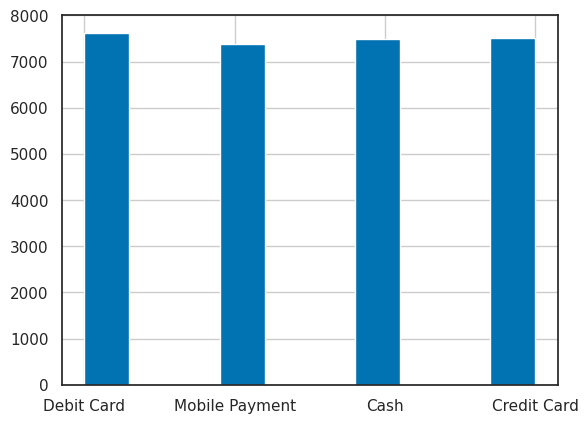

In [15]:
df.Payment_Method.hist()

In [ ]:
# Grafica los demás histogramas de las otras columnas
df.

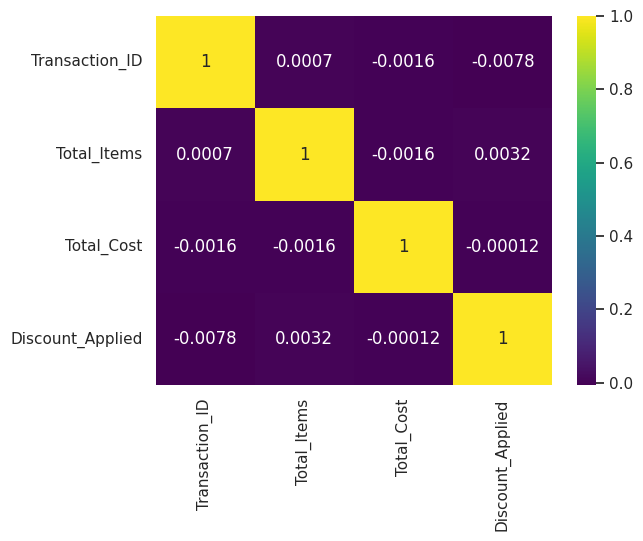

In [16]:
#plot heatmap
correlation=df.corr(numeric_only=True)
ax = sns.heatmap(correlation,annot=True,cmap='viridis')


Text(60.107820312499996, 0.5, 'Total_Cost')

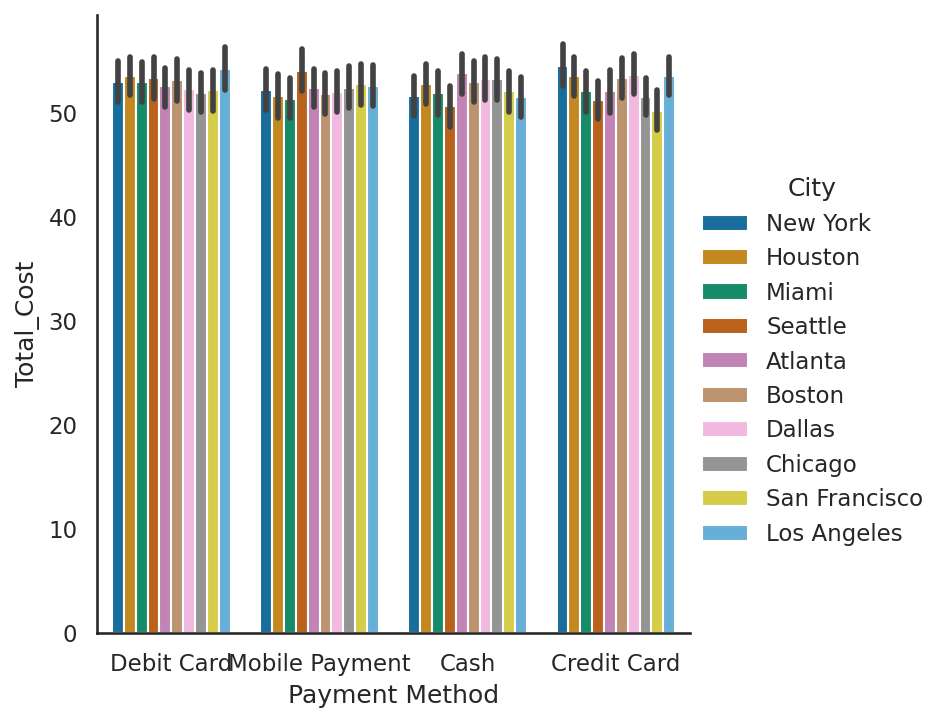

In [17]:
p=sns.catplot(x="Payment_Method",y="Total_Cost",hue="City",data=df,kind='bar')
p.fig.set_dpi(150);
plt.xlabel("Payment Method")
plt.ylabel("Total_Cost")

In [ ]:
#Plot pairwise relationships in a dataset
g = sns.pairplot(df,hue=#Completa

#Fechas

In [21]:
#Si fuera tipo datetime se podrìa utilizar el metodo .year para extraer el año
type(df['Date'][0])

str

In [23]:
df[['Year', 'Month', 'Day']] = df['Date'].str.split('-', expand=True)
df.drop(["Date"],axis=1, inplace=True)
df

,Transaction_ID,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion,Year,Month,Day
0,1000000000,Cheyenne Newman,['Hair Gel'],6,12.77,Debit Card,New York,Convenience Store,True,Student,Winter,None,2020,12,21 19:42:52
1,1000000001,Emily Fitzgerald,"['Tuna', 'Bread', 'Tissues', 'Trash Bags']",5,13.88,Debit Card,Houston,Supermarket,False,Professional,Fall,BOGO (Buy One Get One),2020,07,06 07:45:16
2,1000000002,Michael Webb,"['Jam', 'Soap', 'Ketchup']",7,47.02,Debit Card,Miami,Convenience Store,False,Young Adult,Winter,None,2021,10,02 06:28:44
3,1000000003,Kimberly Lin,['BBQ Sauce'],9,83.86,Mobile Payment,Seattle,Warehouse Club,True,Senior Citizen,Summer,Discount on Selected Items,2022,01,10 05:39:02
4,1000000004,Cathy Hernandez,"['Hand Sanitizer', 'Bread', 'Extension Cords',...",4,30.55,Debit Card,Houston,Warehouse Club,False,Senior Citizen,Spring,None,2021,10,13 07:28:47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1000029995,Candice Wilson,"['Butter', 'Tuna', 'Vinegar', 'Shower Gel', 'O...",7,31.74,Debit Card,New York,Supermarket,True,Professional,Spring,Discount on Selected Items,2023,10,16 06:01:01
29996,1000029996,Jay Yu,['Honey'],8,5.84,Cash,Chicago,Pharmacy,True,Professional,Summer,Discount on Selected Items,2020,04,08 17:31:16
29997,1000029997,Larry Miller,"['Ironing Board', 'Toothbrush']",7,51.10,Credit Card,Los Angeles,Supermarket,True,Young Adult,Fall,Discount on Selected Items,2020,12,18 07:10:45
29998,1000029998,Jeremy Foster,"['Broom', 'Lawn Mower']",7,65.67,Mobile Payment,Seattle,Department Store,True,Retiree,Summer,BOGO (Buy One Get One),2020,02,28 00:29:39


#Mascaras

In [28]:
df['Year']=='2020'

0         True
1         True
2        False
3        False
4        False
         ...  
29995    False
29996     True
29997     True
29998     True
29999     True
Name: Year, Length: 30000, dtype: bool

In [24]:
df2020 = df[df['Year']=='2020']
df2020

,Transaction_ID,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion,Year,Month,Day
0,1000000000,Cheyenne Newman,['Hair Gel'],6,12.77,Debit Card,New York,Convenience Store,True,Student,Winter,None,2020,12,21 19:42:52
1,1000000001,Emily Fitzgerald,"['Tuna', 'Bread', 'Tissues', 'Trash Bags']",5,13.88,Debit Card,Houston,Supermarket,False,Professional,Fall,BOGO (Buy One Get One),2020,07,06 07:45:16
8,1000000008,Christopher Wang,"['Banana', 'Pickles']",2,20.04,Cash,Chicago,Warehouse Club,False,Teenager,Winter,Discount on Selected Items,2020,03,05 23:47:29
11,1000000011,Shari Thomas,"['Soap', 'Vacuum Cleaner', 'Shower Gel', 'Mayo...",9,69.48,Debit Card,San Francisco,Pharmacy,True,Senior Citizen,Fall,None,2020,01,18 08:59:50
24,1000000024,Larry Stephens,"['Dishware', 'Plant Fertilizer', 'Hair Gel', '...",5,28.31,Debit Card,Miami,Supermarket,False,Middle-Aged,Spring,None,2020,02,21 07:38:04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29993,1000029993,Casey Jennings DDS,"['Bath Towels', 'Mop', 'Chips', 'Diapers']",8,73.93,Cash,San Francisco,Department Store,True,Teenager,Summer,BOGO (Buy One Get One),2020,06,15 22:30:57
29996,1000029996,Jay Yu,['Honey'],8,5.84,Cash,Chicago,Pharmacy,True,Professional,Summer,Discount on Selected Items,2020,04,08 17:31:16
29997,1000029997,Larry Miller,"['Ironing Board', 'Toothbrush']",7,51.10,Credit Card,Los Angeles,Supermarket,True,Young Adult,Fall,Discount on Selected Items,2020,12,18 07:10:45
29998,1000029998,Jeremy Foster,"['Broom', 'Lawn Mower']",7,65.67,Mobile Payment,Seattle,Department Store,True,Retiree,Summer,BOGO (Buy One Get One),2020,02,28 00:29:39


In [26]:
df2021 = df[df['Year']=='2021']
df2022 = df[df['Year']=='2022']
df2023 = df[df['Year']=='2023']

In [27]:
df.groupby(['Year','Month'])['Total_Cost'].sum()

Year  Month
2020  01       35575.55
      02       30502.21
      03       33560.75
      04       34128.63
      05       33034.91
      06       36278.82
      07       37706.05
      08       36832.49
      09       34483.71
      10       32209.64
      11       32907.24
      12       36697.08
2021  01       34370.60
      02       32325.69
      03       35472.50
      04       34460.56
      05       33591.33
      06       35630.08
      07       37458.92
      08       37150.85
      09       33905.07
      10       33203.66
      11       34931.34
      12       35046.46
2022  01       34804.63
      02       30700.32
      03       33299.64
      04       34034.57
      05       34058.58
      06       33663.19
      07       36970.99
      08       33763.26
      09       33155.29
      10       35247.66
      11       37377.55
      12       31813.58
2023  01       34342.71
      02       30381.30
      03       35798.71
      04       33931.59
      05       32455.10
    

<Axes: xlabel='Month', ylabel='Total_Cost'>

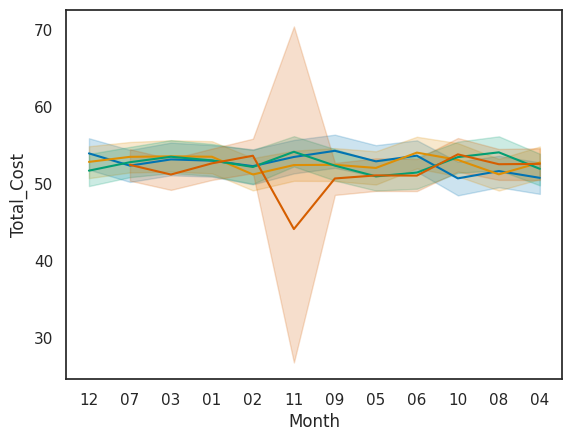

In [40]:
sns.lineplot(data=df2020, x="Month", y="Total_Cost",markers=True,legend='full')
sns.lineplot(data=df2021, x="Month", y="Total_Cost",markers=True,legend='full')
sns.lineplot(data=df2022, x="Month", y="Total_Cost",markers=True,legend='full')
sns.lineplot(data=df2023, x="Month", y="Total_Cost",markers=True,legend='full')

In [41]:
#Funciones y métodos útiles

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Cat = le.fit_transform(df['col1'].values)
le.classes_

In [ ]:
subdf = pd.DataFrame.reset_index(df.loc[(df['col1']=='valorOcondicion') | df['col1']=='calorOcondicion2'])

In [ ]:
ColumnName = 'NombreColumna'
keys = dfOriginal.keys()
Newdf = pd.DataFrame(columns=keys)
for i in range(0,len(dfOriginal)):
  if 'ElTexto' in dfOriginal[ColumnName][i]:
    Newdf = pd.concat((Newdf,dfOriginal.iloc[[i]]),ignore_index=True)

#Aquí intenté instalar [esta librería](https://github.com/ydataai/ydata-profiling)

In [24]:
! pip install -U ydata-profiling[notebook,unicode,pyspark]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.1 MB/s eta 0:00:00


In [27]:
! pip install typing-extensions

In [29]:
from ydata_profiling import ProfileReport
## typing
from typing import TypeAlias
profile = ProfileReport(df, title="Profiling Report")

ImportError: ignored